<a href="https://colab.research.google.com/github/Sopralapanca/TwitterDataset-DM-Project/blob/develop/DM_visualization_task1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries
import pandas as pd
from pandas import DataFrame

import numpy as np

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math
import calmap
import os
import calendar

from os import path
from sys import getsizeof

### Loading the Data

In [3]:
!gdown 1-1YU_OmNl7HGeGt_AdPLwJ3Wn1Fos1kW
!gdown 1aw--B6vc79j9Gvn1c0V_YVXasD6orsiH

Downloading...
From: https://drive.google.com/uc?id=1-1YU_OmNl7HGeGt_AdPLwJ3Wn1Fos1kW
To: /content/tweets_new_.csv
100% 1.64G/1.64G [00:09<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aw--B6vc79j9Gvn1c0V_YVXasD6orsiH
To: /content/users_new_.csv
100% 3.19M/3.19M [00:00<00:00, 135MB/s]


In [4]:
max_rows = 0
 
users_df = pd.read_csv("/content/users_new_.csv") 

if max_rows != 0:
  tweets_df = pd.read_csv("/content/tweets_new_.csv", nrows=max_rows)
else:
  tweets_df = pd.read_csv("/content/tweets_new_.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29582442 entries, 0 to 29582441
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      object 
 1   id              object 
 2   user_id         float64
 3   retweet_count   float64
 4   reply_count     float64
 5   favorite_count  float64
 6   num_hashtags    float64
 7   num_urls        float64
 8   num_mentions    float64
 9   created_at      object 
 10  text            object 
 11  is_retweet      object 
dtypes: float64(7), object(5)
memory usage: 2.6+ GB


In [6]:
for col in users_df.columns:
  print(f"{col} have NaN: {users_df[col].isna().values.any()} : {users_df[col].isna().sum()}")  

Unnamed: 0 have NaN: False : 0
user_id have NaN: False : 0
name have NaN: False : 0
lang have NaN: False : 0
bot have NaN: False : 0
subscription_date have NaN: False : 0
statuses_count have NaN: False : 0
number_of_tweets have NaN: False : 0
tweets_2019 have NaN: False : 0
tweets_2020 have NaN: False : 0
likes_sum have NaN: False : 0
likes_mean have NaN: False : 0
likes_max have NaN: False : 0
ratio_num_likes_and_num_tweets have NaN: False : 0
time_delta_sec have NaN: False : 0
favorite_count_entropy have NaN: False : 0
num_hashtags_entropy have NaN: False : 0
created_at_entropy have NaN: False : 0
mean_length have NaN: False : 0
number_of_special_chars have NaN: False : 0
len_all_tweets have NaN: False : 0
mean_special_char have NaN: False : 0
num_hashtags_mean have NaN: False : 0
num_hashtags_max have NaN: False : 0
num_urls_mean have NaN: False : 0
num_urls_max have NaN: False : 0
num_mentions_mean have NaN: False : 0
num_mentions_max have NaN: False : 0
user_number_of_retweets hav

In [7]:
tweets_df.drop_duplicates(subset=['id'], inplace=True)
users_df.drop(columns=['Unnamed: 0', 'name'], inplace=True)

In [8]:
tweets_df["created_at"]=pd.to_datetime(tweets_df["created_at"]
                                       , errors='coerce', yearfirst=True)

users_df["subscription_date"]=pd.to_datetime(users_df["subscription_date"]
                                      , errors='coerce', yearfirst=True)

In [9]:
# If a value can't be converted to integer a NaN is inserted
# The NaN will be replaced later

tweets_df['is_retweet'] = pd.to_numeric(tweets_df['is_retweet'], 
                              errors='coerce', downcast='integer')
tweets_df['id'] = pd.to_numeric(tweets_df['id'], 
                              errors='coerce', downcast='integer')
tweets_df['user_id'] = pd.to_numeric(tweets_df['user_id'], 
                              errors='coerce', downcast='integer')

In [10]:
users_df['lang'] = users_df['lang'].astype('string')

In [11]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: x.encode('ISO-8859-1', errors='replace').decode('utf-8', errors='replace') if not pd.isnull(x) else x)
tweets_df['text'] = tweets_df['text'].astype('string')

In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10599312 entries, 0 to 29582441
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Unnamed: 0      object        
 1   id              float64       
 2   user_id         float64       
 3   retweet_count   float64       
 4   reply_count     float64       
 5   favorite_count  float64       
 6   num_hashtags    float64       
 7   num_urls        float64       
 8   num_mentions    float64       
 9   created_at      datetime64[ns]
 10  text            string        
 11  is_retweet      float64       
dtypes: datetime64[ns](1), float64(9), object(1), string(1)
memory usage: 1.0+ GB


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         11508 non-null  int64         
 1   lang                            11508 non-null  string        
 2   bot                             11508 non-null  int64         
 3   subscription_date               11508 non-null  datetime64[ns]
 4   statuses_count                  11508 non-null  float64       
 5   number_of_tweets                11508 non-null  int64         
 6   tweets_2019                     11508 non-null  int64         
 7   tweets_2020                     11508 non-null  int64         
 8   likes_sum                       11508 non-null  int64         
 9   likes_mean                      11508 non-null  float64       
 10  likes_max                       11508 non-null  int64         
 11  ra

## Visualizing data distributions


In this section we will show the distribution of the data by displaying different plots for various features in the dataset.

In [14]:
color=['#12a0d7']

### Tweets dataset

**Data distribution of numerical fields**

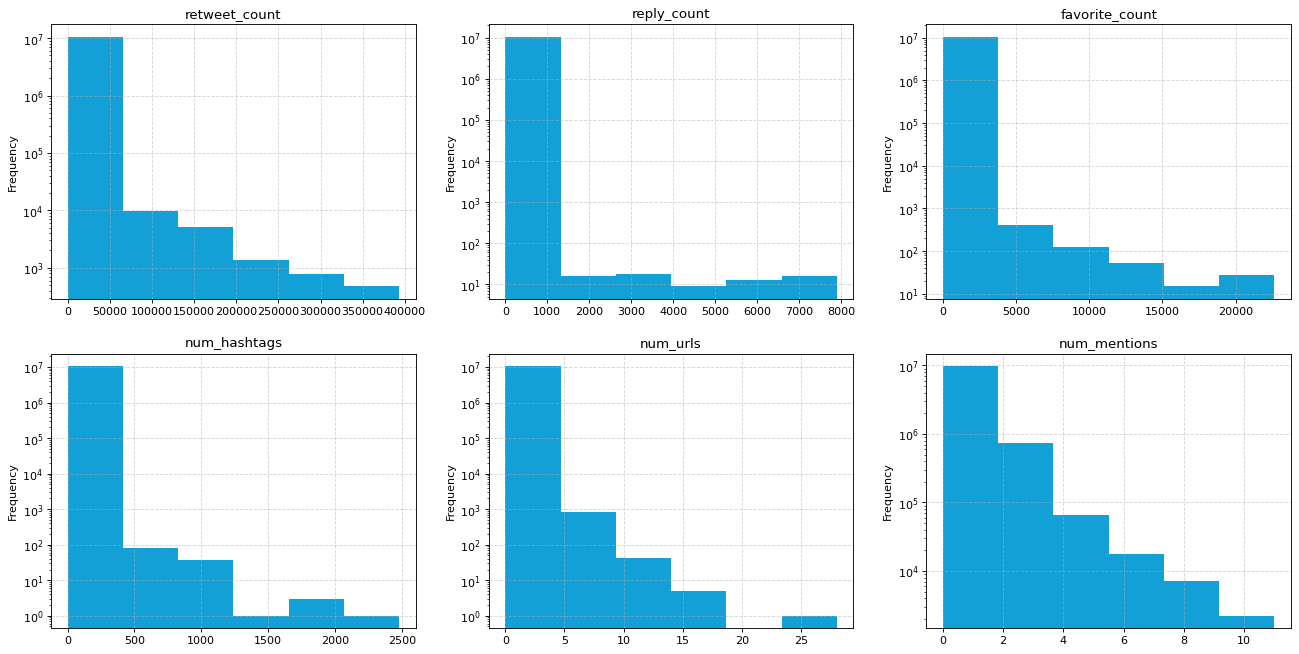

In [15]:
def multiple_histograms(df: DataFrame, columns):
  fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, dpi=80)
  idx_col = 0

  for i in range(2):
    for j in range(3):

      col = columns[idx_col]
      idx_col +=1
      
      ax = tweets_df[col].plot.hist(bins=6, logy=True,
                                    align='mid',title=col,
                                    grid=True,figsize=(20,10),
                                    ax = axs[i, j], color=color)

      ax.grid(axis='both', alpha=0.5, linestyle='--')
   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_histograms(tweets_df, columns=columns)

As we can see from the scale the number differ in width till a scale of 10^210, but for only few tweets. This can be read as a clear mark of rows outside the normal distribution.

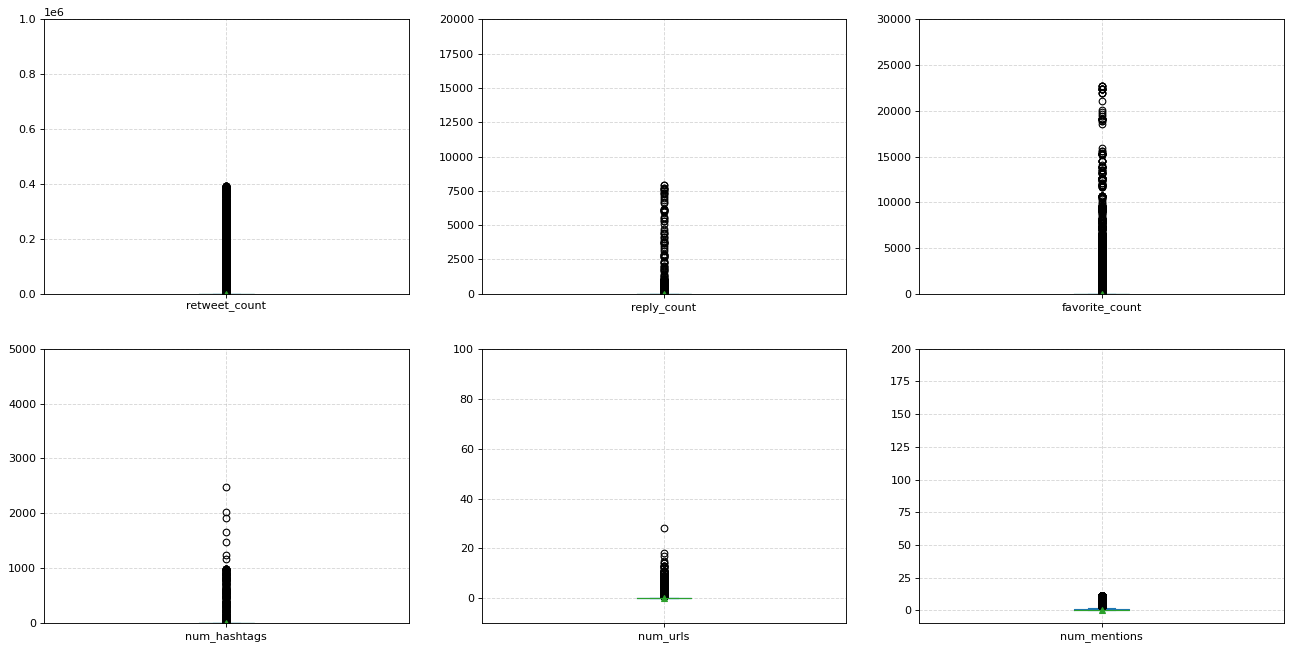

In [16]:
y_ranges = [1000000, 20000, 30000, 5000, 100, 200]

def multiple_boxplots(df: DataFrame, columns):
  fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, dpi=80)
  fig.set_size_inches(20, 10)
  idx_col = 0

  for i in range(2):
    for j in range(3):

      col = columns[idx_col]
      ax = tweets_df[col].plot.box(showmeans=True, 
                              grid=True, ax = axs[i, j])
      ax.set_ylim(-10, y_ranges[idx_col])


      ax.grid(axis='both', alpha=0.5, linestyle='--')
      idx_col +=1

   
      
columns = ["retweet_count", "reply_count", "favorite_count", "num_hashtags",  "num_urls", "num_mentions"] 

multiple_boxplots(tweets_df, columns=columns)

As we can see from the boxplots above there are many values collapsed in dense areas, than there are very high values that will be dealt with, mantaining the significative informations, in such a way that we can have the focus in the right spots.

As can be seen from the graph, there are tweets with dates that are meaningless, as there are dates that correspond to when twitter was not yet created or are dates in the future.

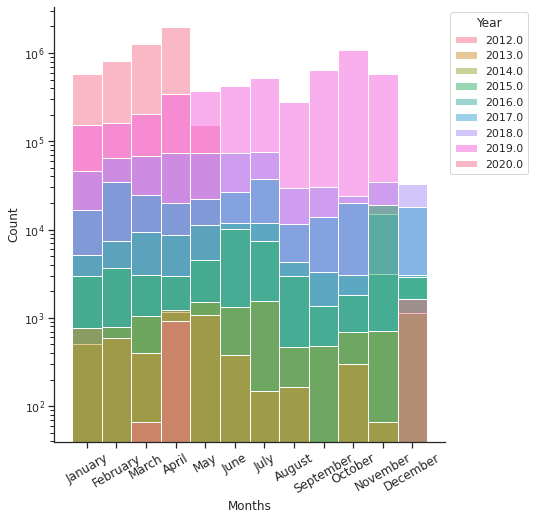

In [17]:
import calendar

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
sns.despine(f)

# Create the histogram setting the column to be represented and the one to overlap
g = sns.histplot(
    tweets_df,
    x=tweets_df['created_at'].dt.month, hue=tweets_df['created_at'].dt.year,
    multiple='layer',
    log_scale=[False, True],
    discrete=True,
    palette='husl'
)

# Tweak the visual presentation
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xlabel('Months')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Year')
ax.set_xticklabels([month for month in calendar.month_name[1:]],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 30})
plt.show()

del g, ax

**Distribution of lenght of tweets**


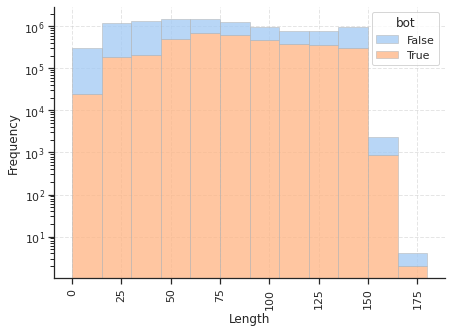

In [18]:
bot_mask = users_df['bot'] == True
tweets_by_bot = tweets_df
tweets_by_bot['bot'] = tweets_df['user_id'].isin(users_df[bot_mask]['user_id'])

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    tweets_by_bot,
    x=tweets_by_bot['text'].str.len(), hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
    binwidth=15,
    binrange=[0, 180],
)
ax.set_ylabel("Frequency")
ax.set_xlabel("Length")
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

del f, ax

**Distribution of the tweets based on the IDs**

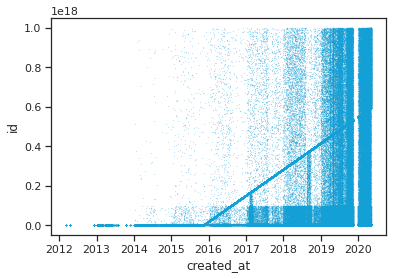

In [19]:
ax1 = tweets_df.plot.scatter(x='created_at', y='id', c=color, s=0.01)
plt.show()
del ax1

Here we do a zoom for the tweets with the correct dates in order to estrapolate some sort of correlation between IDs and dates. As we can see there is more density with the growth of the ID in late dates.

### Users dataset

**Distribution of languages**

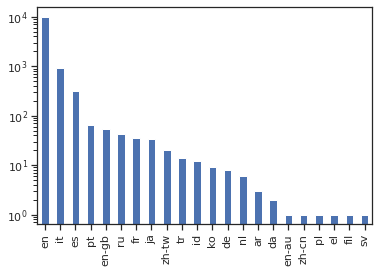

In [20]:
users_df['lang'].value_counts().plot(kind='bar', logy=True)
plt.show()

**Distribution of created_at**

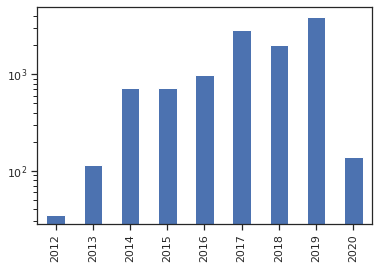

In [21]:
users_df['subscription_date'].dt.year.value_counts().sort_index().plot(kind='bar', logy=True)
plt.show()

**Distribution of statuses count**

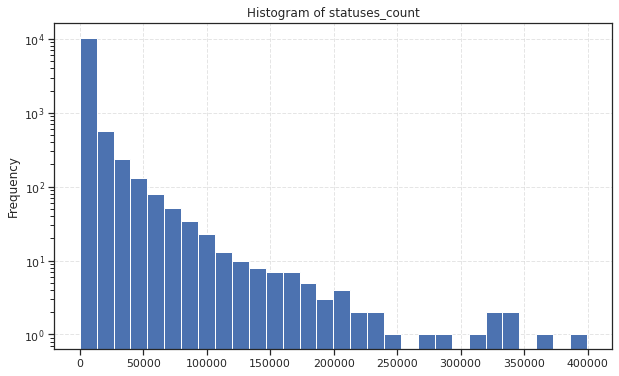

In [22]:
ax = users_df['statuses_count'].plot.hist(bins=30, logy=True, 
                                           align='mid',title="Histogram of statuses_count",
                                           figsize=(10,6), grid=True)


ax.grid(axis='both', alpha=0.5, linestyle='--')

del ax

## Visualizing data distributions by differentiating bots and non-bots.


### Languages of actual users and bot

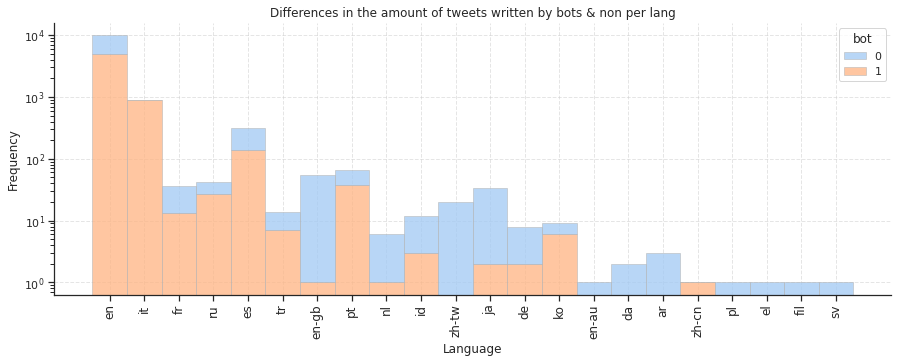

In [23]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    users_df,
    x='lang', hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
).set(title='Differences in the amount of tweets written by bots & non per lang')
ax.set_ylabel("Frequency")
ax.set_xlabel("Language")
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.set_xticklabels([lang for lang in users_df['lang'].unique()],
                    fontdict={'horizontalalignment': 'center', 'fontsize': 12, 'rotation': 90})
plt.show()

del f, ax

### Percentage of the number of user: Bot vs No-Bot

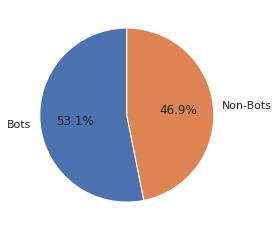

In [24]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]
labels = 'Bots', 'Non-Bots'
sizes = [len(bots), len(non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### Percentage of the number of tweet :  Bot vs No-Bot

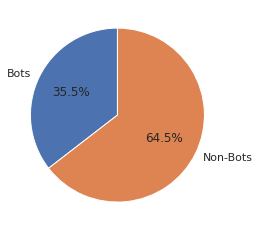

In [25]:
bots = users_df[users_df['bot'] == 1]
non_bots = users_df[users_df['bot'] == 0]

bots_ids = bots['user_id'].to_list()
tweets_of_bots = tweets_df[tweets_df['user_id'].isin(bots_ids)]

non_bots_ids = non_bots['user_id'].to_list()
tweets_of_non_bots = tweets_df[tweets_df['user_id'].isin(non_bots_ids)]

labels = 'Bots', 'Non-Bots'
sizes = [len(tweets_of_bots), len(tweets_of_non_bots)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### How long are the tweets written by the bots & non-bots?

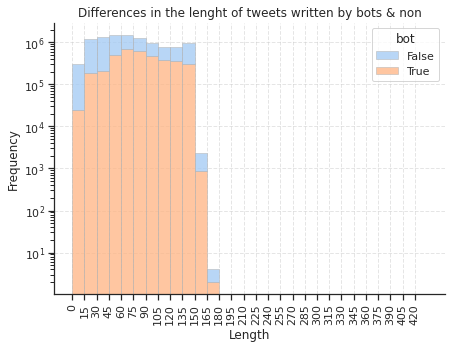

In [26]:
bot_mask = users_df['bot'] == True
tweets_by_bot = tweets_df
tweets_by_bot['bot'] = tweets_df['user_id'].isin(users_df[bot_mask]['user_id'])

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    tweets_by_bot,
    x=tweets_by_bot['text'].str.len(), hue='bot',
    multiple="stack",
    palette=sns.color_palette("pastel",2),
    edgecolor=".7",
    log_scale = [False, True],
    linewidth=.5,
    stat='count',
    binwidth=15,
    binrange=[0, 430],
).set(title='Differences in the lenght of tweets written by bots & non')
ax.set_ylabel("Frequency")
ax.set_xlabel("Length")
xticks = np.arange(0, 430, 15)
ax.set_xticks(xticks)
ax.grid(axis='both', alpha=0.5, linestyle='--')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

del f, ax

### When were the bots created (years)?

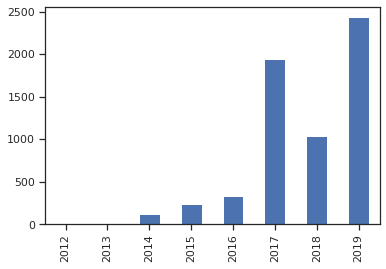

In [27]:
users_df.loc[users_df["bot"] == True]['subscription_date'].dt.year.value_counts().sort_index().plot(kind="bar")
plt.show()

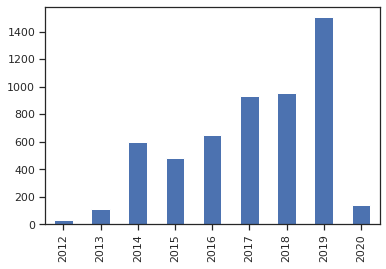

In [28]:
users_df.loc[users_df["bot"] == False]['subscription_date'].dt.year.value_counts().sort_index().plot(kind="bar")
plt.show()

### Calendar Heatmaps

Here there are plots showing how much sparse the data are in the years, as we can see most of the days have few tweets compared with the spikes in late 2019 and early 2020.

Calendar heatmap of tweets wrote by bots

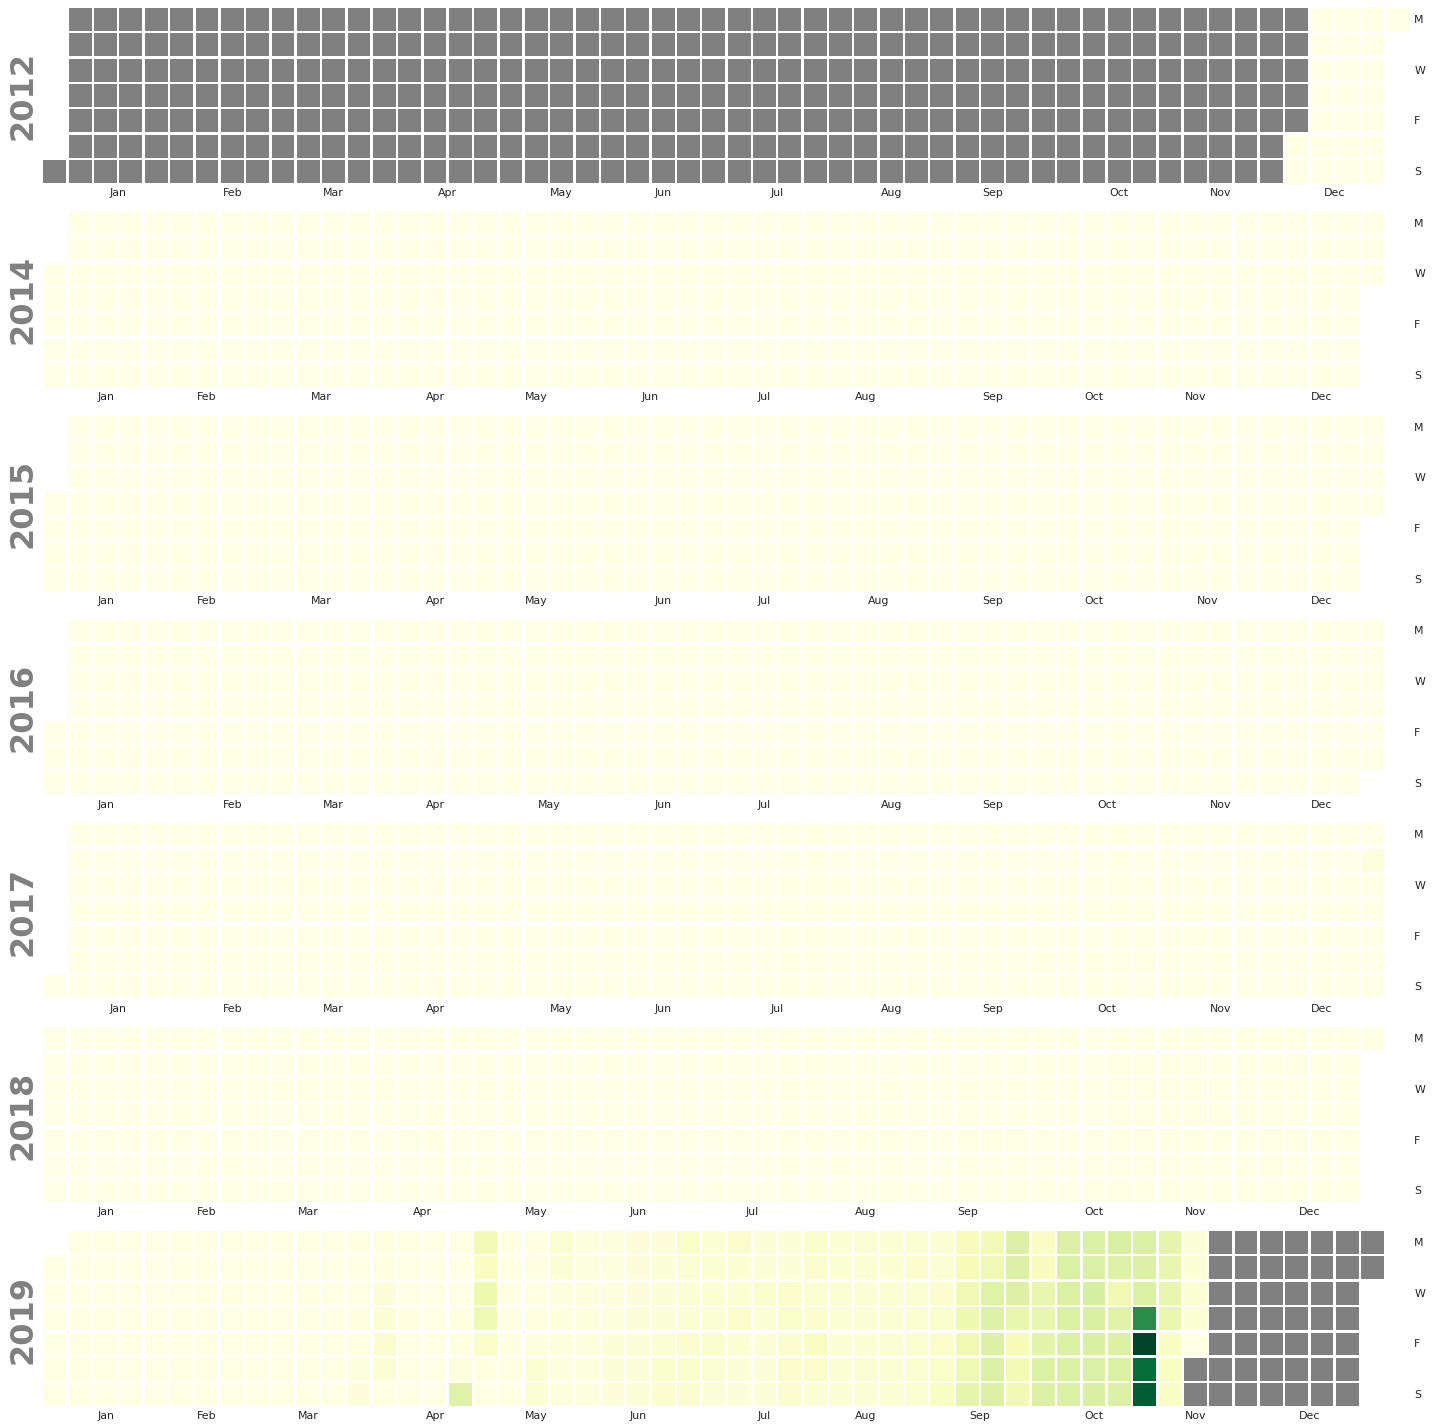

In [29]:
bots = users_df[users_df['bot'] == True]
bots_id = bots['user_id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 20)))
plt.show()

Calendar heatmap of tweets wrote by non-bots


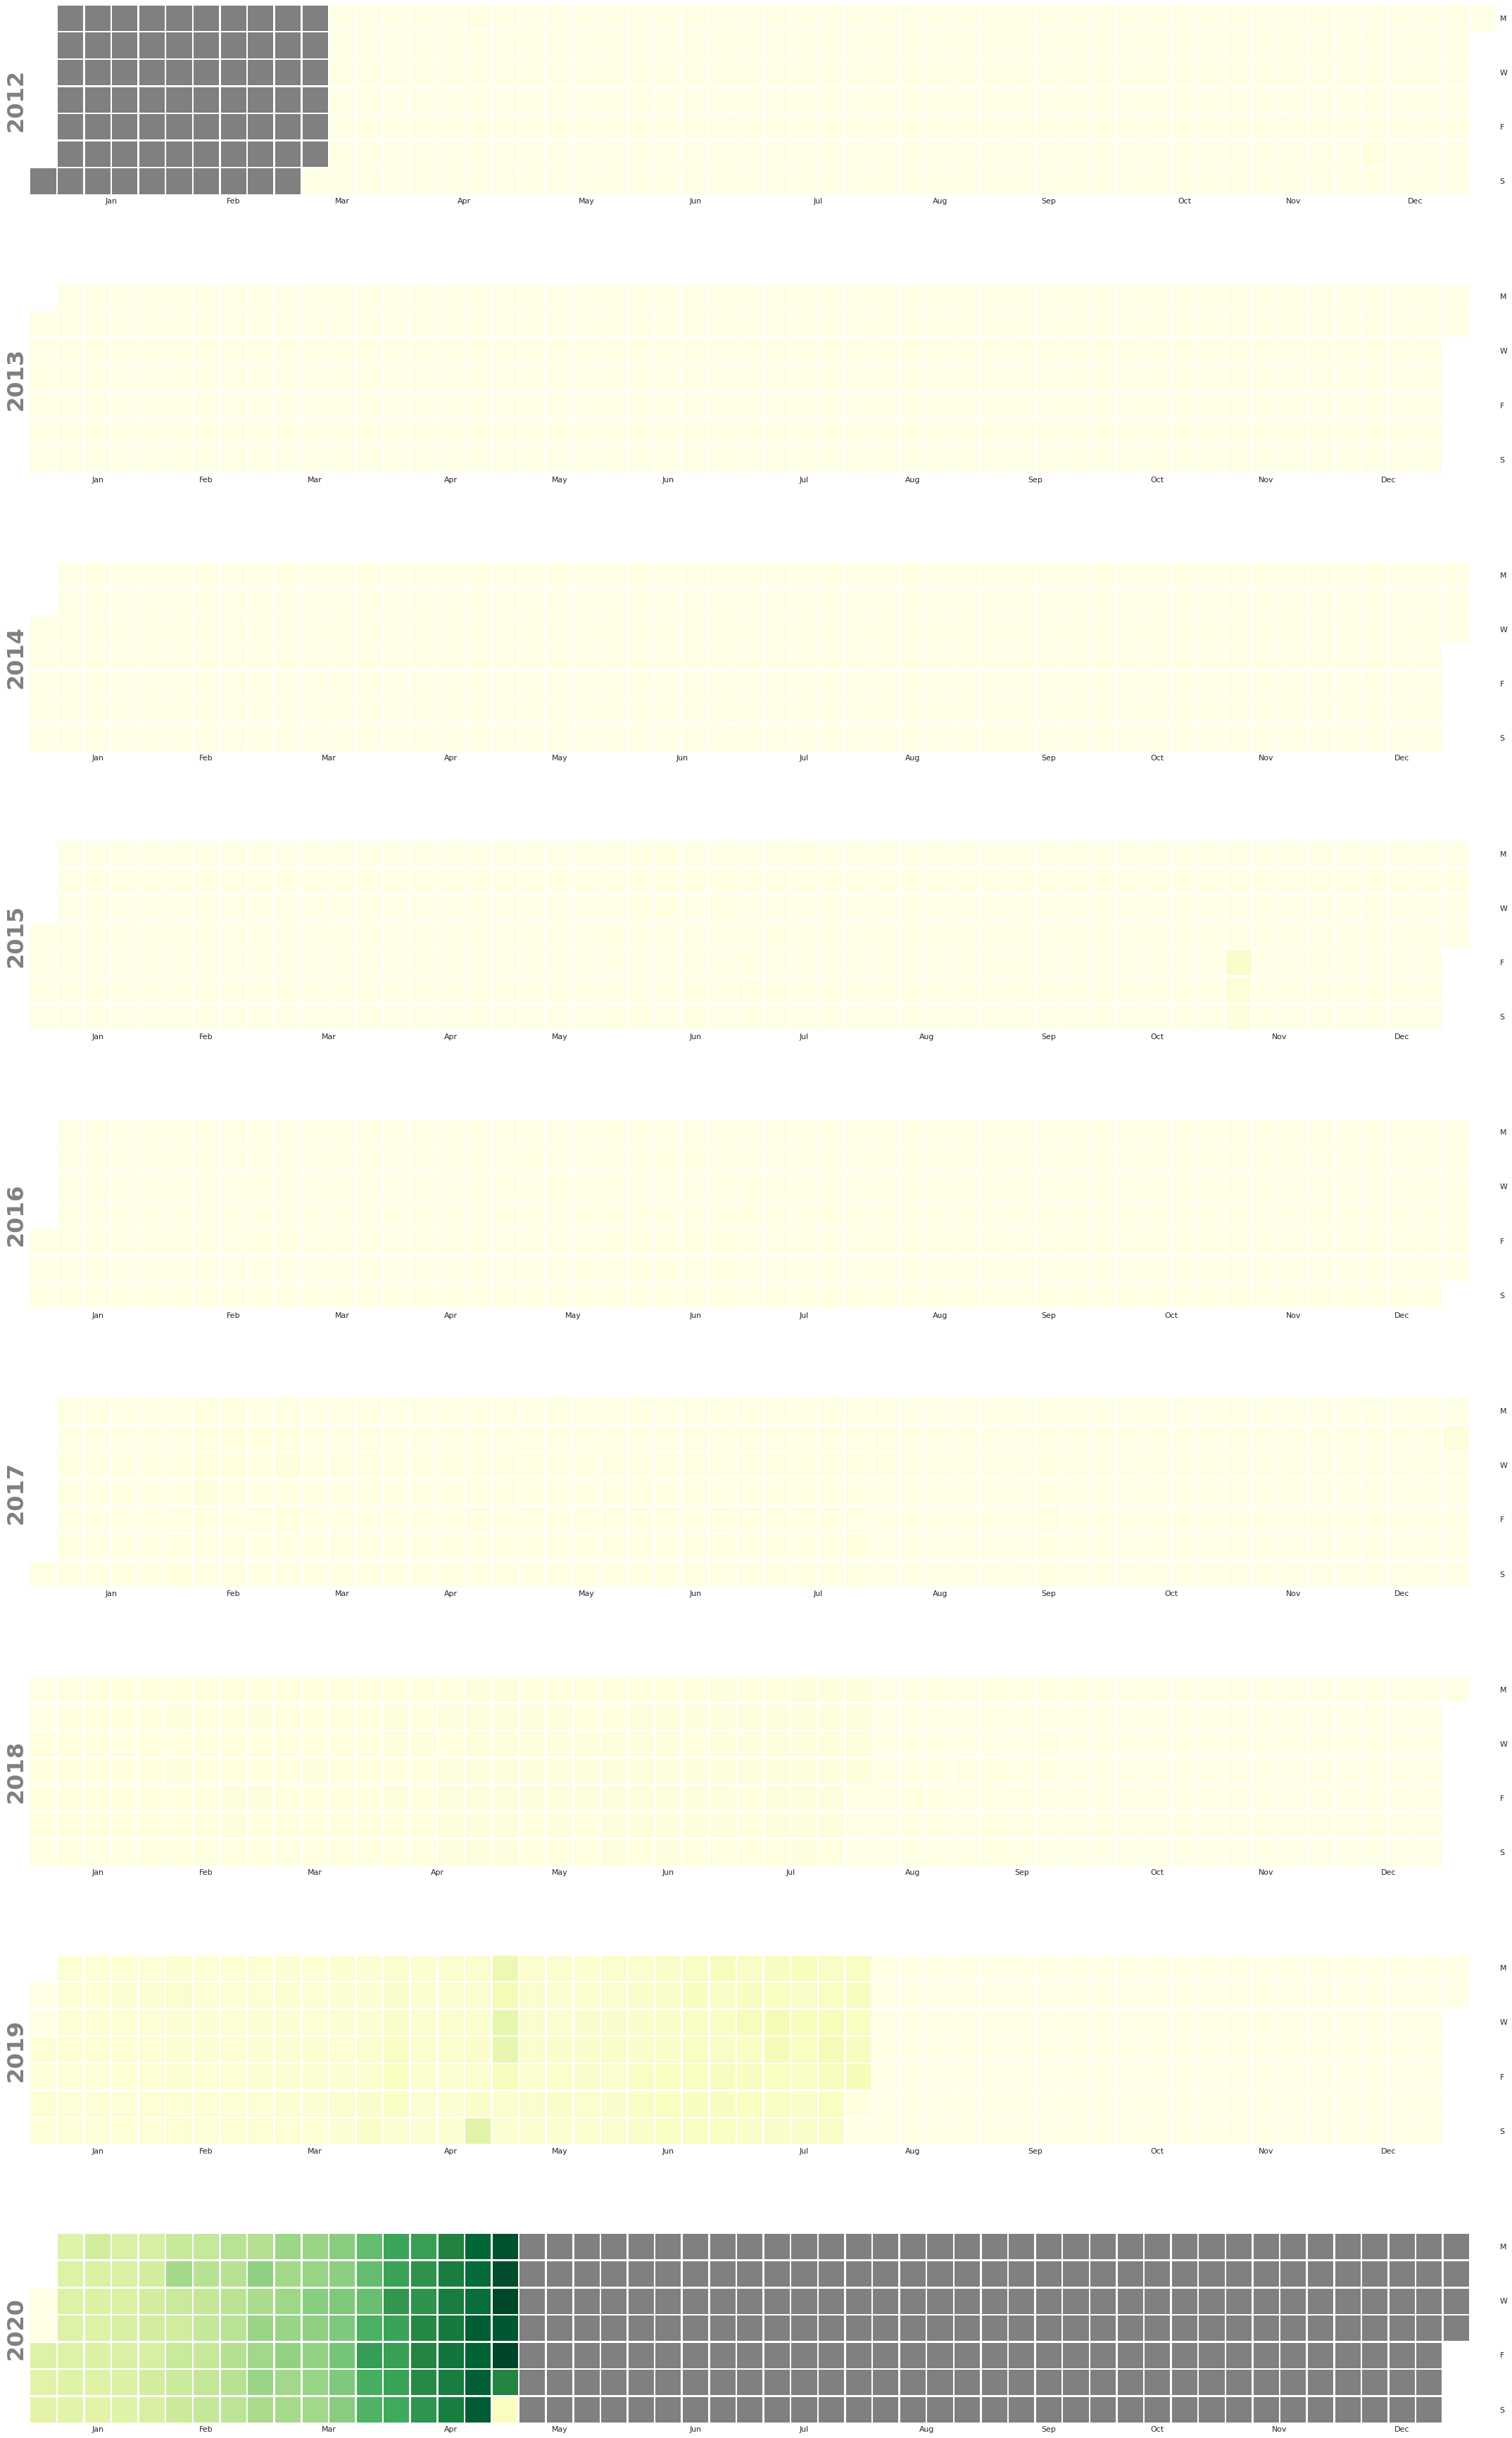

In [30]:
bots = users_df[users_df['bot'] == False]
bots_id = bots['user_id'].to_list()
bots_tweets_df = tweets_df[tweets_df['user_id'].isin(bots_id)]
events = bots_tweets_df['created_at'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 50)))
plt.show()

Calendar heatmap of creation of bots


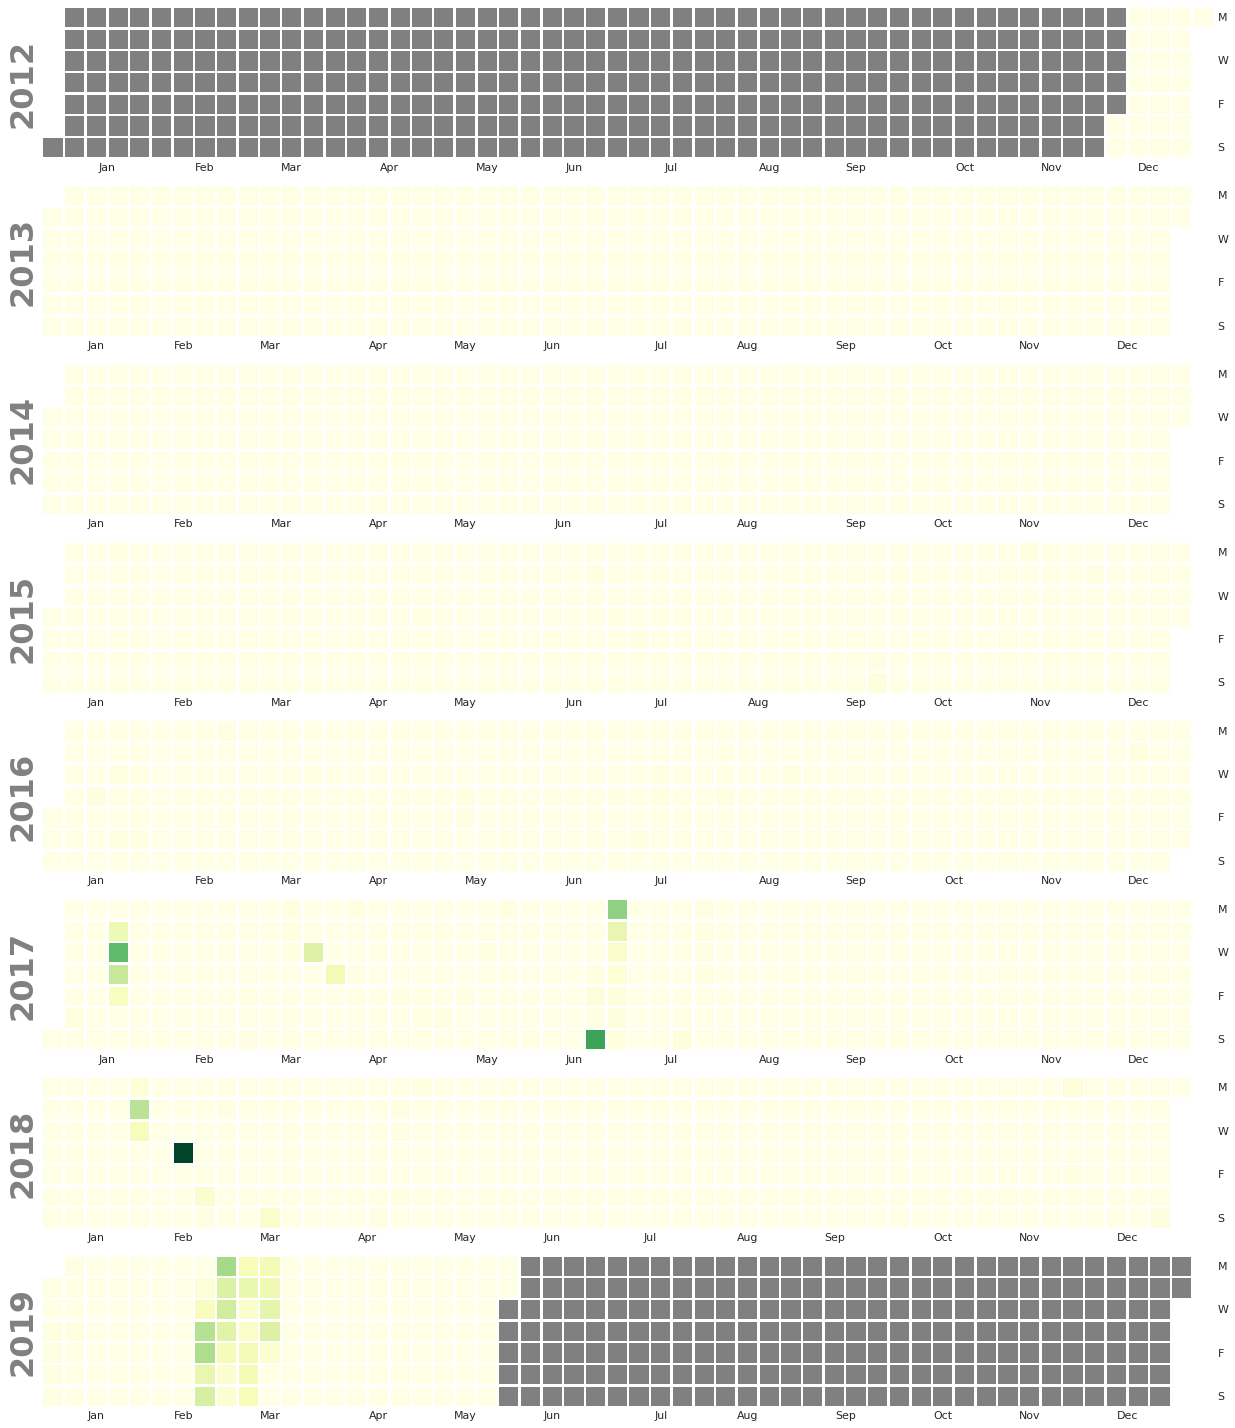

In [31]:
bots = users_df[users_df['bot'] == True]
events = bots['subscription_date'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5, 
                    fig_kws=dict(figsize=(30, 20)))
plt.show()

Calendar heatmap of creation of non-bots


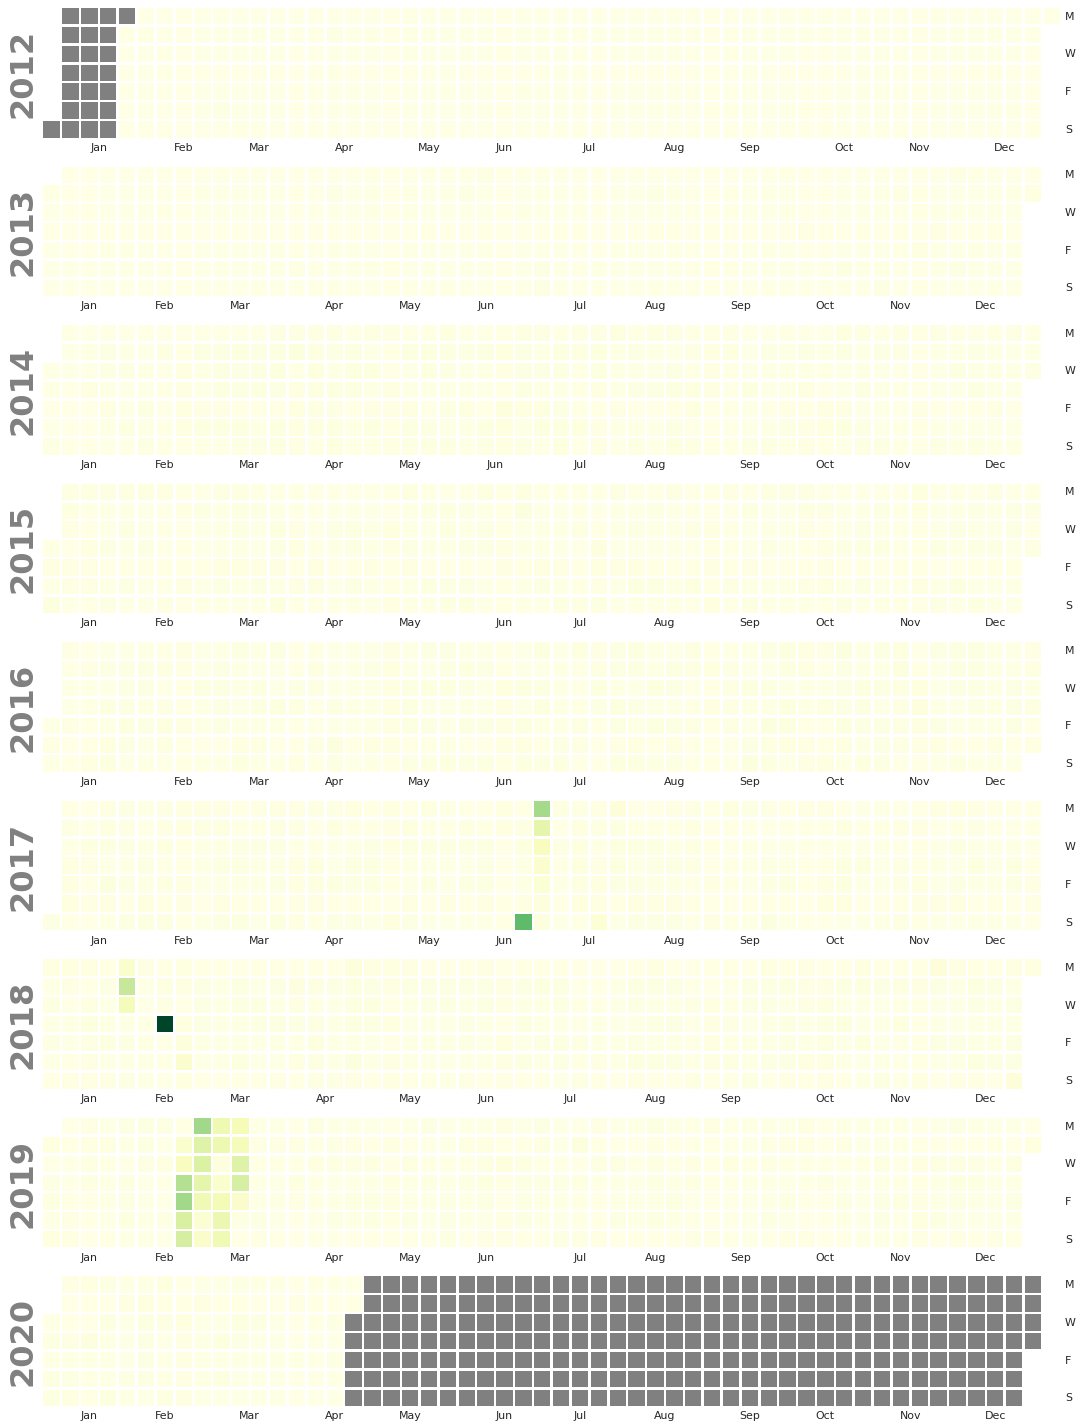

In [32]:
non_bots = users_df[users_df['bot'] == False]
events = non_bots['subscription_date'].value_counts()

calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', 
                    linewidth=1.5,
                    fig_kws=dict(figsize=(30, 20)))
plt.show()